# Wine Classifier for  EDA

This notebook was used as a scratchpad for EDA on the wine data set. 

It has been tidied up and grouped into sections.

# EDA Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Basic Plotting defaults

# Set figure defaults for consistent, appropriately-sized plots
plt.rcParams['figure.figsize'] = (10, 6)  # Width x Height in inches
plt.rcParams['figure.dpi'] = 100          # Display resolution
plt.rcParams['savefig.dpi'] = 300         # Save resolution (high quality)
plt.rcParams['savefig.bbox'] = 'tight'    # Tight bounding box
plt.rcParams['font.size'] = 12            # Readable font size
plt.rcParams['figure.figsize'] = [10, 6]

# import seaborn for the nicer plots
import seaborn as sns

# common style setting for academic reports
plt.style.use('seaborn-v0_8-whitegrid')

# Compact figure settings
FIGSIZE_COMPACT = (3, 2.5)
DPI_SAVE_COMPACT = 100

# Medium sized settings
FIGSIZE_MID = (5,4)
DPI_SAVE_MID = 150

# Large Settings (multiple plots)
FIGSIZE_LARGE = (10,6)
DPI_SAVE_LARGE = 250

# Duplicate Checking in Original Data Set


The original data had duplicates. 

In [2]:
df_original = pd.read_csv('data/raw/winequality-all.csv')  

print("Wine dataset loaded!")
print(f"Shape: {df_original.shape}")

print(f"Duplicate rows: {df_original.duplicated().sum()}")

print(1117/6497)

print(df_original.columns)

Wine dataset loaded!
Shape: (6497, 13)
Duplicate rows: 1177
0.1719255040788056
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type'],
      dtype='object')


# Load Data Without Duplicates

Loads the data into `df` dataframe for subsequent sections.

For simplicity, creates a `feature_names` list.


In [6]:

df = pd.read_csv('data/processed/wine_unique.csv')  
print("Wine dataset loaded!")
print(f"Shape: {df.shape}")
print("Dataset Info:")
print(df.info())

print("\nFirst 5 rows:")
df.head()

feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']


Wine dataset loaded!
Shape: (5320, 13)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  wine_type             5320 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 540.4+ KB
None

Firs

# Plot showing wines before and after duplicates were removed.

wine_type
red      1599
white    4898
Name: count, dtype: int64
                 red  white
Before Removal  1599   4898
After Removal   1359   3961


/tmp/ipykernel_854520/3089871797.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'red': [raw_counts[0], processed_counts[0]],
/tmp/ipykernel_854520/3089871797.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'white': [raw_counts[1], processed_counts[1]],


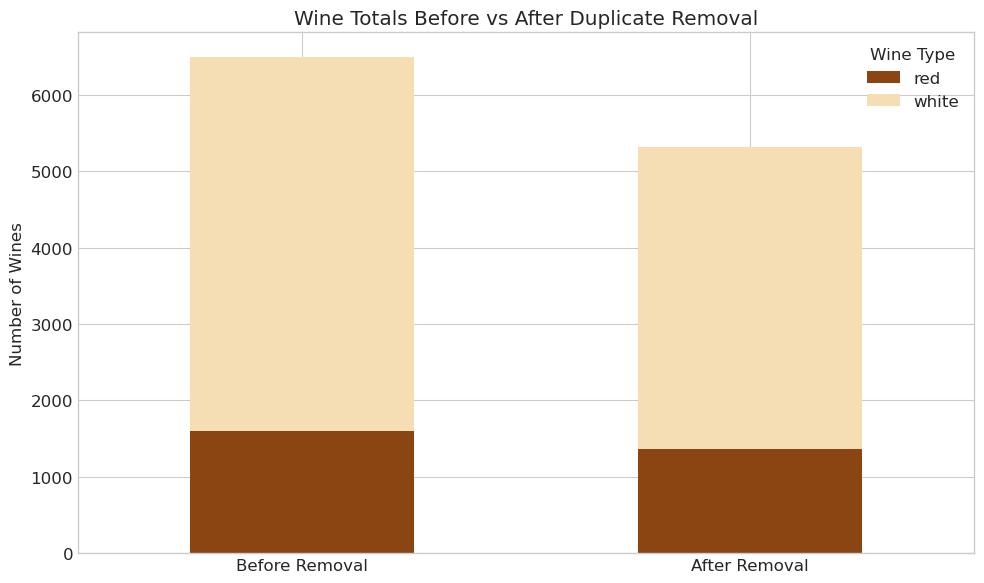

In [5]:

# Count wine types before and after duplicate removal
raw_counts = df_original['wine_type'].value_counts().sort_index()
processed_counts = df['wine_type'].value_counts().sort_index()

print(raw_counts)

# Build a data frame out of the totals for each wine
# The Indexes will be used for each bar
barplot_df = pd.DataFrame({
    'red': [raw_counts[0], processed_counts[0]],
    'white': [raw_counts[1], processed_counts[1]],
}, index=['Before Removal', 'After Removal'])



print(barplot_df)

# Simple stacked bar chart
plt.figsize=(4,3)
ax = barplot_df.plot(kind='bar', stacked=True, color=['#8B4513', '#F5DEB3'])
plt.title('Wine Totals Before vs After Duplicate Removal')
plt.ylabel('Number of Wines')
plt.xticks(rotation=0)
plt.legend(title='Wine Type')
plt.tight_layout()

plt.savefig('figures/wine_type_chart_2.png', dpi=DPI_SAVE_COMPACT, bbox_inches='tight')
plt.show()



# Basic Descriptive Stats



In [25]:



# Create a df with just features for simplicity
df_features = df[feature_names].copy()

df_features.describe()

print(df_features.describe().round(4).to_markdown())



|       |   fixed acidity |   volatile acidity |   citric acid |   residual sugar |   chlorides |   free sulfur dioxide |   total sulfur dioxide |   density |        pH |   sulphates |   alcohol |
|:------|----------------:|-------------------:|--------------:|-----------------:|------------:|----------------------:|-----------------------:|----------:|----------:|------------:|----------:|
| count |       5320      |          5320      |     5320      |        5320      |   5320      |             5320      |              5320      | 5320      | 5320      |   5320      | 5320      |
| mean  |          7.2152 |             0.3441 |        0.3185 |           5.0485 |      0.0567 |               30.0367 |               114.109  |    0.9945 |    3.2247 |      0.5334 |   10.5492 |
| std   |          1.3197 |             0.1682 |        0.1472 |           4.5002 |      0.0369 |               17.805  |                56.7742 |    0.003  |    0.1604 |      0.1497 |    1.1859 |
| min   |      

# Target Class Plots

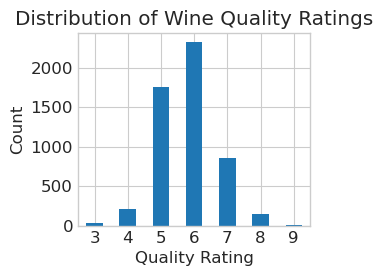

In [8]:
# Quick bar chart of wine quality distribution

plt.figure(figsize=FIGSIZE_COMPACT)
df['quality'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Quality Rating')
plt.title('Distribution of Wine Quality Ratings')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.savefig('figures/original_quality_counts.png', dpi=DPI_SAVE_COMPACT, bbox_inches='tight')
plt.show()

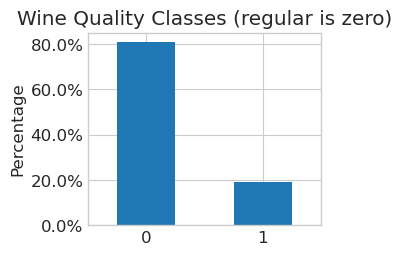

In [39]:

plt.figure(figsize=FIGSIZE_COMPACT)
df['quality_binned'] = (df['quality'] >= 7).astype(int)
df['quality_binned'].value_counts(normalize=True).sort_index().plot(kind='bar')
plt.title('Wine Quality Classes (regular is zero)')
plt.xlabel('')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
# Convert proprortion to percentage on y scale
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
plt.savefig('figures/binary_quality_percentages.png', dpi=DPI_SAVE_COMPACT, bbox_inches='tight')
plt.show()

# Outlier Analysis

## Count the outliers

### Using IQR

In [34]:
print("\nPotential outliers (using IQR):")
for col in feature_names:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if len(outliers) > 0:
        print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.1f}%)")


Potential outliers (using IQR):
fixed acidity: 304 outliers (5.7%)
volatile acidity: 279 outliers (5.2%)
citric acid: 143 outliers (2.7%)
residual sugar: 141 outliers (2.7%)
chlorides: 237 outliers (4.5%)
free sulfur dioxide: 44 outliers (0.8%)
total sulfur dioxide: 10 outliers (0.2%)
density: 3 outliers (0.1%)
pH: 49 outliers (0.9%)
sulphates: 163 outliers (3.1%)
alcohol: 1 outliers (0.0%)


### Using Standard Deviations

In [12]:
# Check for outliers using simple statistics
print("\nPotential outliers (values beyond 3 standard deviations):")
for col in feature_names:
    mean_val = df[col].mean()
    std_val = df[col].std()
    outliers = df[(df[col] < mean_val - 3*std_val) | (df[col] > mean_val + 3*std_val)]
    if len(outliers) > 0:
        print(f"  {col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.1f}%)")


Potential outliers (values beyond 3 standard deviations):
  fixed acidity: 108 outliers (2.0%)
  volatile acidity: 77 outliers (1.4%)
  citric acid: 26 outliers (0.5%)
  residual sugar: 42 outliers (0.8%)
  chlorides: 94 outliers (1.8%)
  free sulfur dioxide: 27 outliers (0.5%)
  total sulfur dioxide: 8 outliers (0.2%)
  density: 3 outliers (0.1%)
  pH: 32 outliers (0.6%)
  sulphates: 63 outliers (1.2%)
  alcohol: 2 outliers (0.0%)


## Feature Boxplots

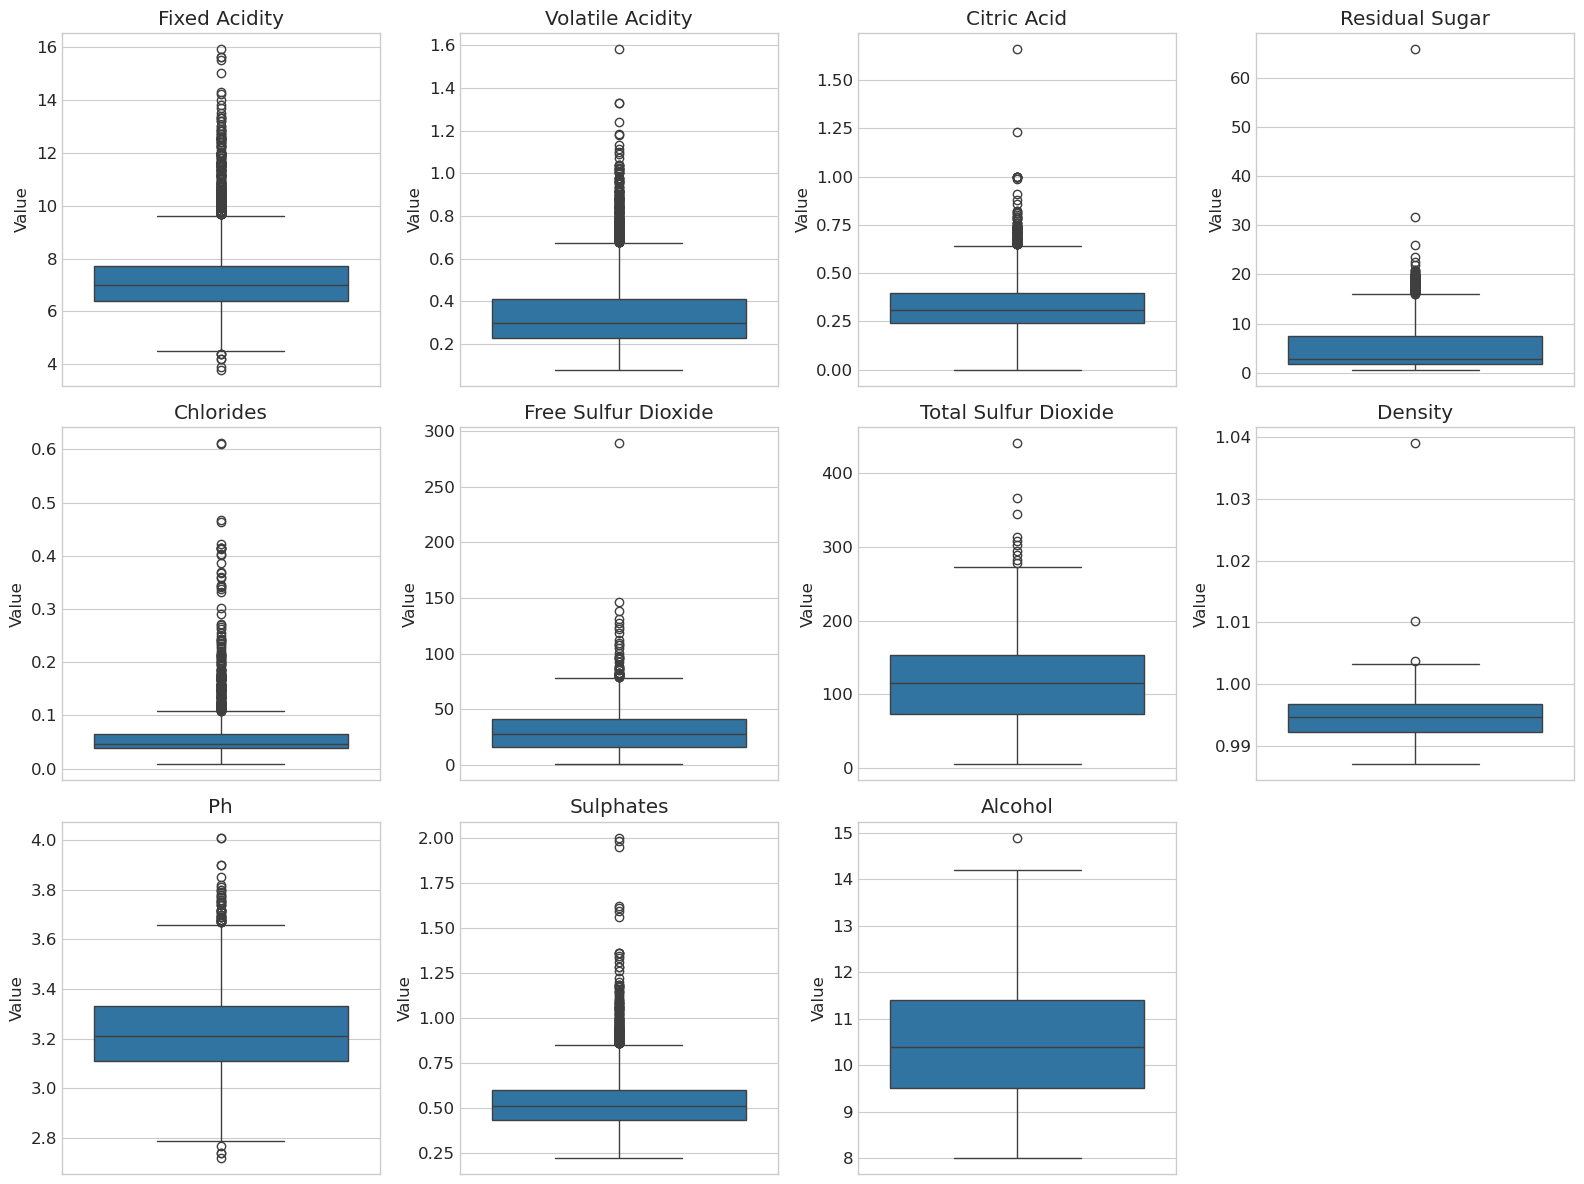

In [ ]:
# boxplots for all continuous features in a grid

n_features = len(feature_names)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
axes = axes.flatten()  

for i, col in enumerate(feature_names):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col.replace('_', ' ').title())
    axes[i].set_ylabel('Value')

# Hide unused subplots
for i in range(n_features, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

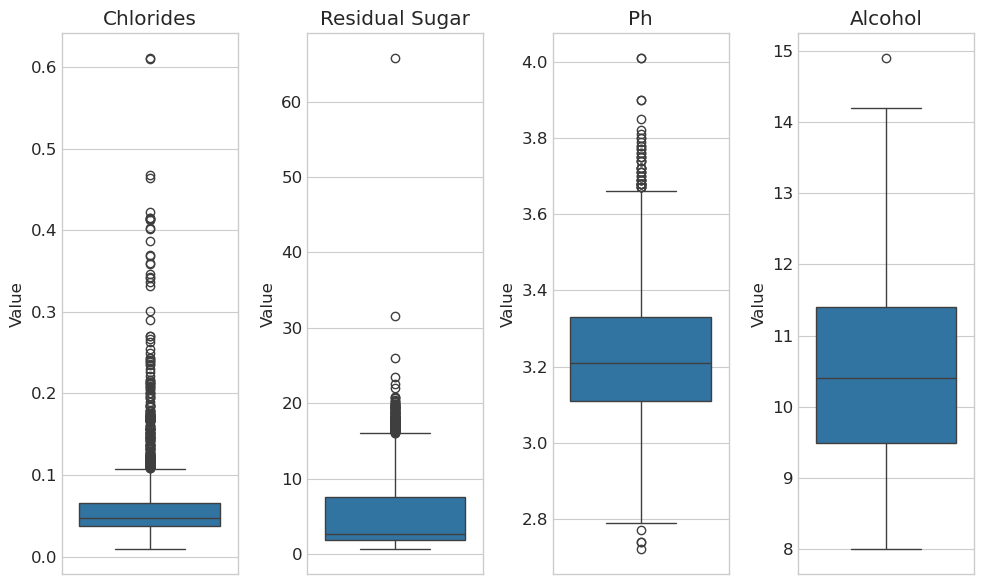

In [37]:
# 4 boxplots for selection

plt.figure(figsize=FIGSIZE_LARGE)
selected_cols = ['chlorides', 'residual sugar','pH', 'alcohol']
fig, axes = plt.subplots(1, 4)

for i, col in enumerate(selected_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col.replace('_', ' ').title())
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.savefig('figures/outlier_boxplots.png', dpi=DPI_SAVE_LARGE, bbox_inches='tight')
plt.show()

## Domain research on Reasonable Values for Features

To see whether the outliers were unusual but realistic in the context of wine production. I asked an AI engine (Claude Opus 4.1) to research realistic values, and summarise. Here are the findings.

| Feature | Units | Realistic Min | Realistic Max | Notes |
|---------|-------|---------------|---------------|-------|
| Fixed acidity | g/dm³ | 3.0 | 18.0 | Very low acid wines exist; high-acid wines can reach 15-18 |
| Volatile acidity | g/dm³ | 0.08 | 2.0 | >1.2 typically considered faulty, but some exist up to 2.0 |
| Citric acid | g/dm³ | 0.0 | 1.5 | Can be completely absent; rarely exceeds 1.0-1.2 naturally |
| Residual sugar | g/dm³ | 0.5 | 65.0 | Dry wines ~1-4; dessert wines can exceed 50-60 |
| Chlorides | g/dm³ | 0.01 | 1.0 | Very pure wines <0.05; salty/faulty wines can reach 0.8+ |
| Free sulfur dioxide | mg/dm³ | 1.0 | 150.0 | Legal limits vary; over-sulfured wines can hit 100-150 |
| Total sulfur dioxide | mg/dm³ | 10.0 | 400.0 | Must be ≥ free SO2; heavily sulfured wines reach 300+ |
| Density | g/cm³ | 0.985 | 1.010 | High sugar/alcohol affects density significantly |
| pH | unitless | 2.7 | 4.2 | Very acidic wines ~2.8; low-acid wines can hit 4.0+ |
| Sulphates | g/dm³ | 0.2 | 2.5 | Natural minimum ~0.3; heavily treated wines reach 2.0+ |
| Alcohol | % vol | 7.0 | 16.5 | Legal minimums vary; fortified-style can reach 16% |

# Feature Distribution

Histograms of features (except wine_type, which is binary)

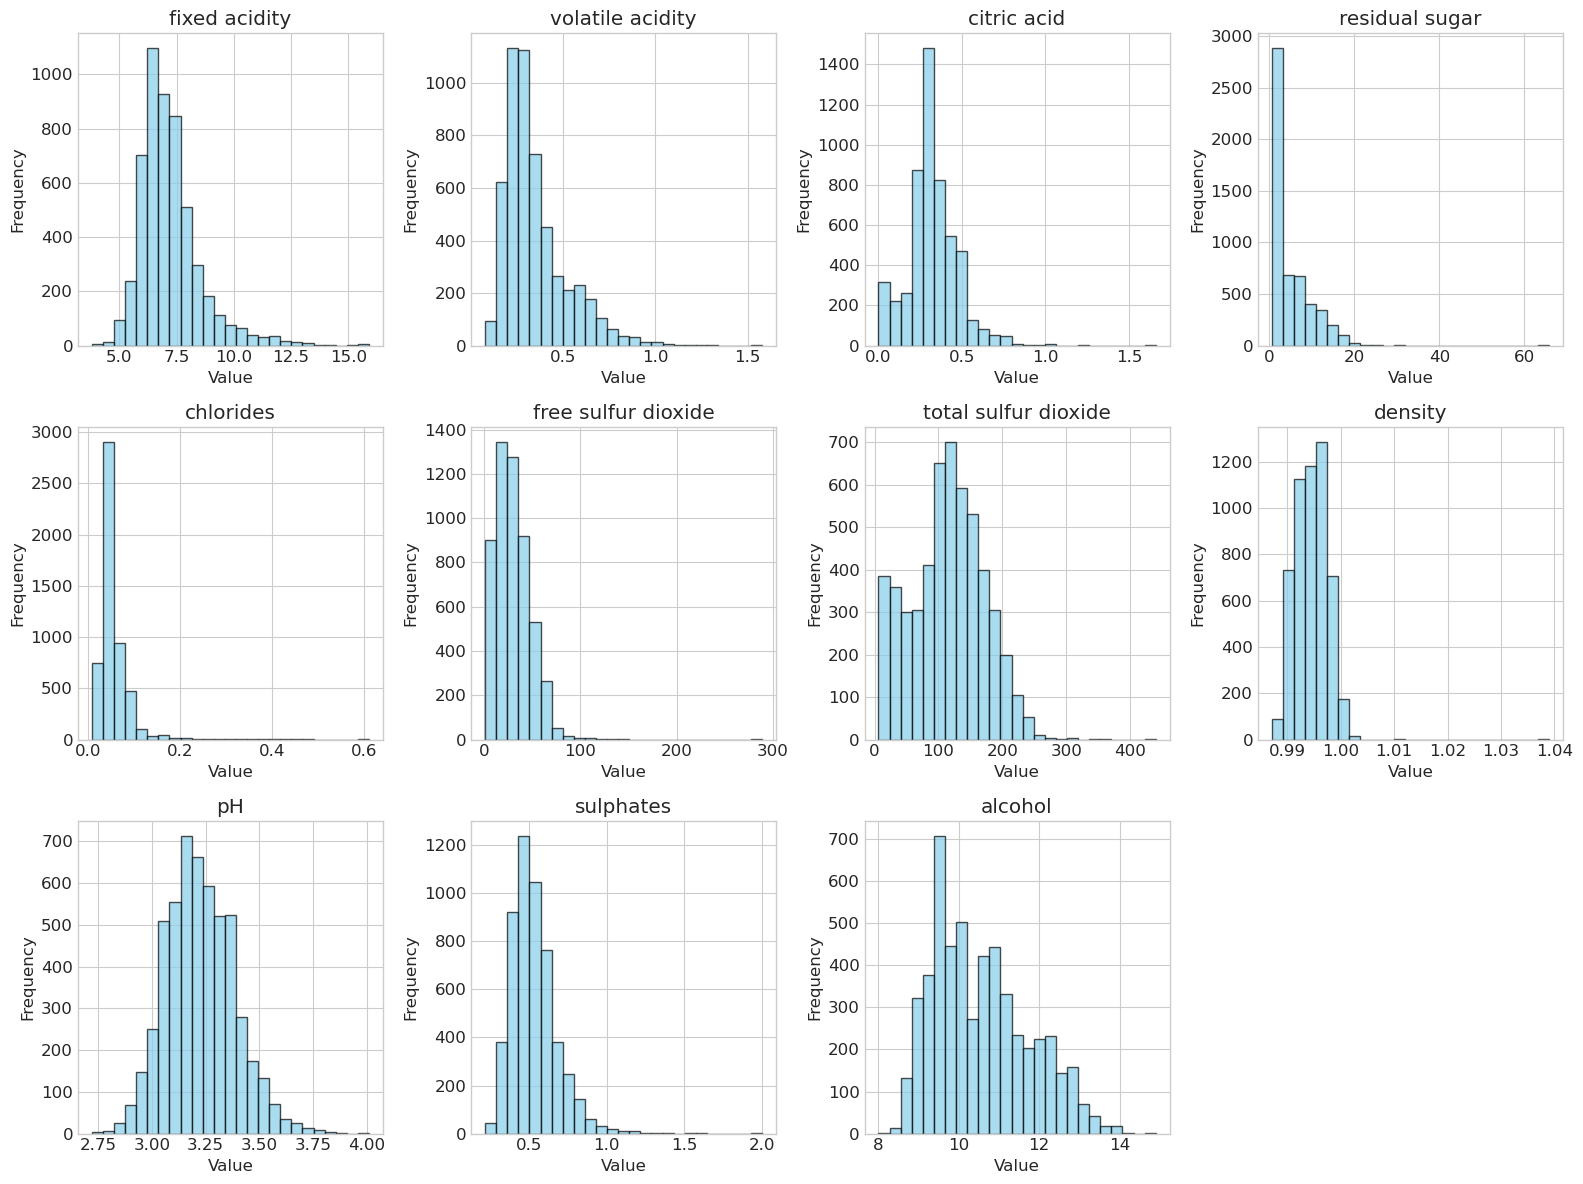

In [15]:


# Organize into a grid with 4 columns
n_features = len(feature_names)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for i, col in enumerate(feature_names):
    ax = axes[i]
    df[col].hist(bins=25, ax=ax, alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_title(f'{col}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Hide unused subplots
for i in range(n_features, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()


plt.savefig('figures/feature_distributions.png', dpi=300, bbox_inches='tight')

plt.show()

## Investigating Skew

In [16]:
print("Feature Skewness:")
skewness = df_features.skew().sort_values(ascending=False)
# print(skewness)

df_skew = skewness.reset_index()
df_skew.columns=['feature','skewness']

# display(df_skew)

print(df_skew.to_markdown(index=False))




Feature Skewness:
| feature              |   skewness |
|:---------------------|-----------:|
| chlorides            |  5.33824   |
| sulphates            |  1.80945   |
| residual sugar       |  1.70655   |
| fixed acidity        |  1.65042   |
| volatile acidity     |  1.50456   |
| free sulfur dioxide  |  1.36272   |
| density              |  0.666326  |
| alcohol              |  0.545696  |
| citric acid          |  0.484309  |
| pH                   |  0.389969  |
| total sulfur dioxide |  0.0636144 |


# Exploring Transformations to reduce skew



In [19]:
skewed_feature_list = ['chlorides','sulphates','residual sugar','fixed acidity','volatile acidity','free sulfur dioxide']

# make a copy of the features
df_transformed = df[feature_names].copy()

for col in skewed_feature_list:
    df_transformed[col] = np.log(df_transformed[col])

df_transformed.head()

skewness = df_transformed.skew().sort_values(ascending=False)
# print(skewness)

df_skew = skewness.reset_index()
df_skew.columns=['feature','skewness']


print(df_skew.round(4).to_markdown(index=False))



| feature              |   skewness |
|:---------------------|-----------:|
| chlorides            |     0.9067 |
| fixed acidity        |     0.8431 |
| density              |     0.6663 |
| alcohol              |     0.5457 |
| citric acid          |     0.4843 |
| sulphates            |     0.394  |
| pH                   |     0.39   |
| volatile acidity     |     0.3304 |
| residual sugar       |     0.3265 |
| total sulfur dioxide |     0.0636 |
| free sulfur dioxide  |    -0.7893 |


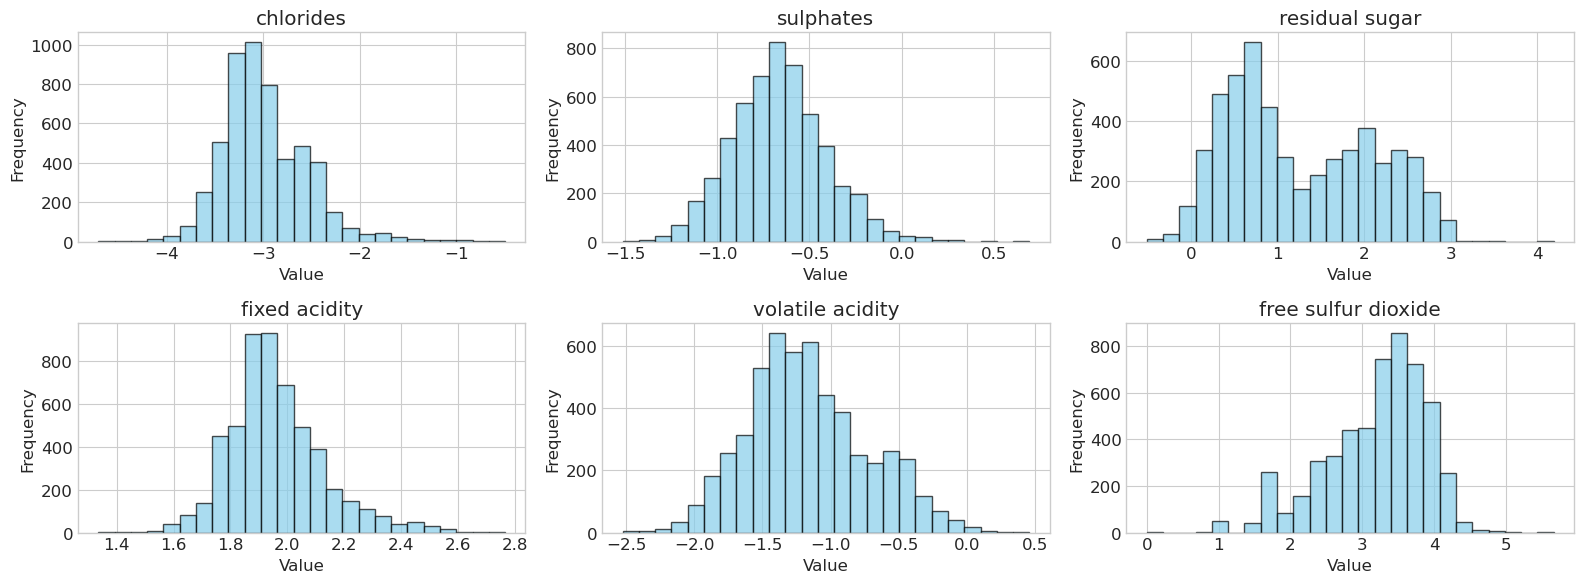

In [20]:


skewed_feature_list = ['chlorides','sulphates','residual sugar','fixed acidity','volatile acidity','free sulfur dioxide']

# Organize into a grid with 3 columns
n_features = len(skewed_feature_list)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 3*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for i, col in enumerate(skewed_feature_list):
    ax = axes[i]
    df_transformed[col].hist(bins=25, ax=ax, alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_title(f'{col}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Hide unused subplots
for i in range(n_features, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()


plt.savefig('figures/transformed_feature_distributions.png', dpi=300, bbox_inches='tight')

plt.show()

# Feature Correlations with Quality

Correlations of each feature with quality, both as tables and plots

Feature correlations with quality:
pH                      0.039733
sulphates               0.041884
total sulfur dioxide    0.050296
free sulfur dioxide     0.054002
residual sugar          0.056830
fixed acidity           0.080092
citric acid             0.097954
chlorides               0.202137
volatile acidity        0.265205
density                 0.326434
alcohol                 0.469422
Name: quality, dtype: float64


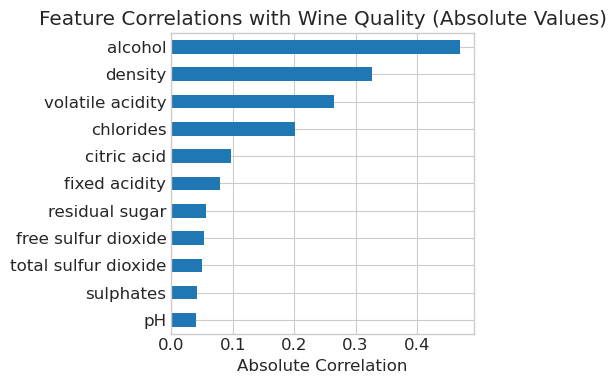

In [21]:
correlations = df[feature_names + ['quality']].corr()['quality'].drop('quality')
correlations_sorted = correlations.abs().sort_values(ascending=True)

print("Feature correlations with quality:")
print(correlations_sorted)

# Plot correlation with quality
plt.figure(figsize=FIGSIZE_MID)
correlations_sorted.plot(kind='barh')
plt.title('Feature Correlations with Wine Quality (Absolute Values)')
plt.xlabel('Absolute Correlation')
plt.tight_layout()

plt.savefig('figures/feature_correlations_with_target.png', dpi=DPI_SAVE_COMPACT, bbox_inches='tight')

plt.show()

Feature correlations with quality:
density                -0.326434
volatile acidity       -0.265205
chlorides              -0.202137
fixed acidity          -0.080092
residual sugar         -0.056830
total sulfur dioxide   -0.050296
pH                      0.039733
sulphates               0.041884
free sulfur dioxide     0.054002
citric acid             0.097954
alcohol                 0.469422
Name: quality, dtype: float64


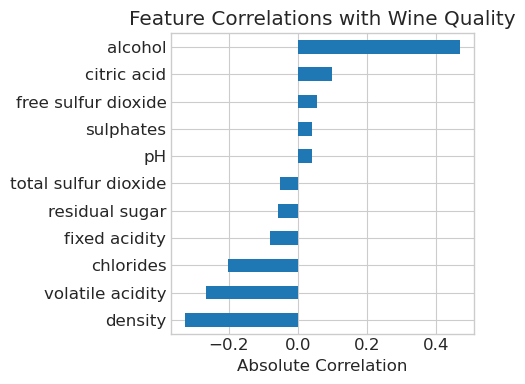

In [22]:
correlations = df[feature_names + ['quality']].corr()['quality'].drop('quality')
correlations_sorted = correlations.sort_values(ascending=True)

print("Feature correlations with quality:")
print(correlations_sorted)

# Plot correlation with quality
plt.figure(figsize=FIGSIZE_MID)
correlations_sorted.plot(kind='barh')
plt.title('Feature Correlations with Wine Quality')
plt.xlabel('Absolute Correlation')
plt.tight_layout()

plt.savefig('figures/feature_corrs_with_target.png', dpi=DPI_SAVE_MID, bbox_inches='tight')

plt.show()

# Feature Correlation Heatmap

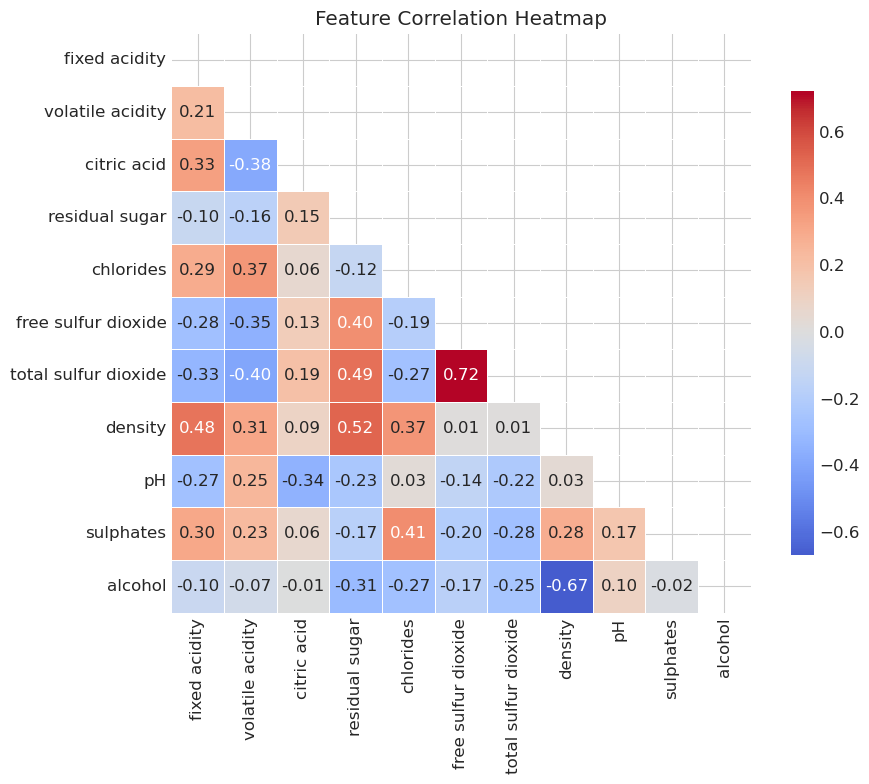

In [23]:
corr_matrix = df[feature_names].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Hide upper triangle
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True,
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap')
plt.tight_layout()

plt.savefig('figures/feature_corrs.png', dpi=300, bbox_inches='tight')
plt.show()

# Multicollinearity

Investigating multicollinearity using the VIF (Variance Inflation Factor) 

Initial VIFS had a very large value for density.

But density has a small variance (values tightly clustered around 1). 

Scaled and recalculated VIF to address this. Discussed further in report.

In [30]:
# Find all the variance inflation factors

# Create a 2 column data frame: features and their VIF
vif_df = pd.DataFrame()
vif_df["Feature"] = df_features.columns
vif_df["VIF"] = [ variance_inflation_factor(df_features.values, i) 
                 for i in range(df_features.shape[1]) ]


print(vif_df.sort_values("VIF", ascending=False))

                 Feature         VIF
7                density  936.140550
8                     pH  587.436005
10               alcohol  105.725667
0          fixed acidity   57.503297
9              sulphates   18.511697
6   total sulfur dioxide   14.202293
2            citric acid    9.404055
1       volatile acidity    8.856584
5    free sulfur dioxide    8.217477
4              chlorides    5.298323
3         residual sugar    3.320388


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
vif_data_scaled = pd.DataFrame(
    scaler.fit_transform(df[feature_names]),
    columns=feature_names
)

vif_scaled_df = pd.DataFrame()
vif_scaled_df["Feature"] = df_features.columns
vif_scaled_df["VIF"] = [ variance_inflation_factor(vif_data_scaled.values, i) 
                 for i in range(vif_data_scaled.shape[1]) ]

print(vif_scaled_df.sort_values("VIF", ascending=False))


                 Feature        VIF
7                density  14.921847
3         residual sugar   6.428070
0          fixed acidity   4.882077
10               alcohol   4.575001
6   total sulfur dioxide   2.932805
8                     pH   2.480073
5    free sulfur dioxide   2.136488
1       volatile acidity   1.957219
2            citric acid   1.654623
4              chlorides   1.632266
9              sulphates   1.547848
